## Introduction

The labels of each face image is embedded in the file name
, formated like [age]_[gender]_[race]_[date&time].jpg

 - **[age]** is an integer from **0 to 116**, indicating the age
 - **[gender]** is either **0 (male) or 1 (female)**
 - **[race]** is an integer from **0 to 4**, denoting _White, Black, Asian, Indian, and Others_ (like Hispanic, Latino, Middle Eastern).
 - **[date&time]** is in the format of **yyyymmddHHMMSSFFF**, showing the date and time an image was collected to UTKFace


Images Shape:
 - **200 x 200 x 3**

# IMPORTS

In [22]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from tkinter import Tcl
import regex as re

## Analysis Functions

In [87]:
def load_images_from_folder(foldername):
    filenames = [f for f in os.listdir(folder_path) if not f.startswith(".")]
    filenames.sort(key=lambda f: int(re.sub('\D', '', f)))
    images = []
    for filename in os.listdir(foldername):
        if filename.startswith('80'):
            break
        img_cv = cv2.imread(os.path.join(foldername,filename))
        if img_cv is not None:
            img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images

In [90]:
def load_image_data_into_dataframe(foldername):
    
    filenames = [f for f in os.listdir(folder_path) if not f.startswith(".")]
    filenames.sort(key=lambda f: int(re.sub('\D', '', f)))
    
    df = pd.DataFrame()
    for filename in os.listdir(foldername):
        if filename.startswith('80'):
            break
        parsed_name = filename.split('_')
        df= df.append({'age' : int(parsed_name[0]),
                       'gender' : parsed_name[1],
                       'race' : parsed_name[2]}, ignore_index=True)
    df['gender'] = df['gender'].map({'0': 'male', '1': 'female'})
    df['race'] = df['race'].map({'0': 'White', '1': 'Black', '2': 'Asian', '3': 'Indian', '4': 'Others'})
    return df

In [88]:
def show_all_images_from_list(img_list,img_df):
    n=int(len(img_list)/5) +1 
    f = plt.figure(figsize=(25,n*5))
    for i,img in enumerate(img_list):
        f.add_subplot(n, 5, i + 1)
        plt.title(f'Age: {img_df.iloc[i]["age"]}; Race: {img_df.iloc[i]["race"]}',
                 fontweight="bold",fontsize=15)
        plt.imshow(img)

In [14]:
folder_path = "../data/UTKFace/"

In [5]:
img_list=load_images_from_folder(folder_path)

23708

In [56]:
filenames = os.listdir(folder_path)
filenames.sort(key=lambda f: int(re.sub('\D', '', f)))

In [85]:
img_df = load_image_data_into_dataframe(folder_path)

## Visualization

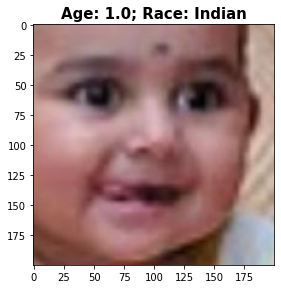

In [28]:
show_all_images_from_list(img_list[-2:-1],img_df.iloc[-2:-1])

## Distribution

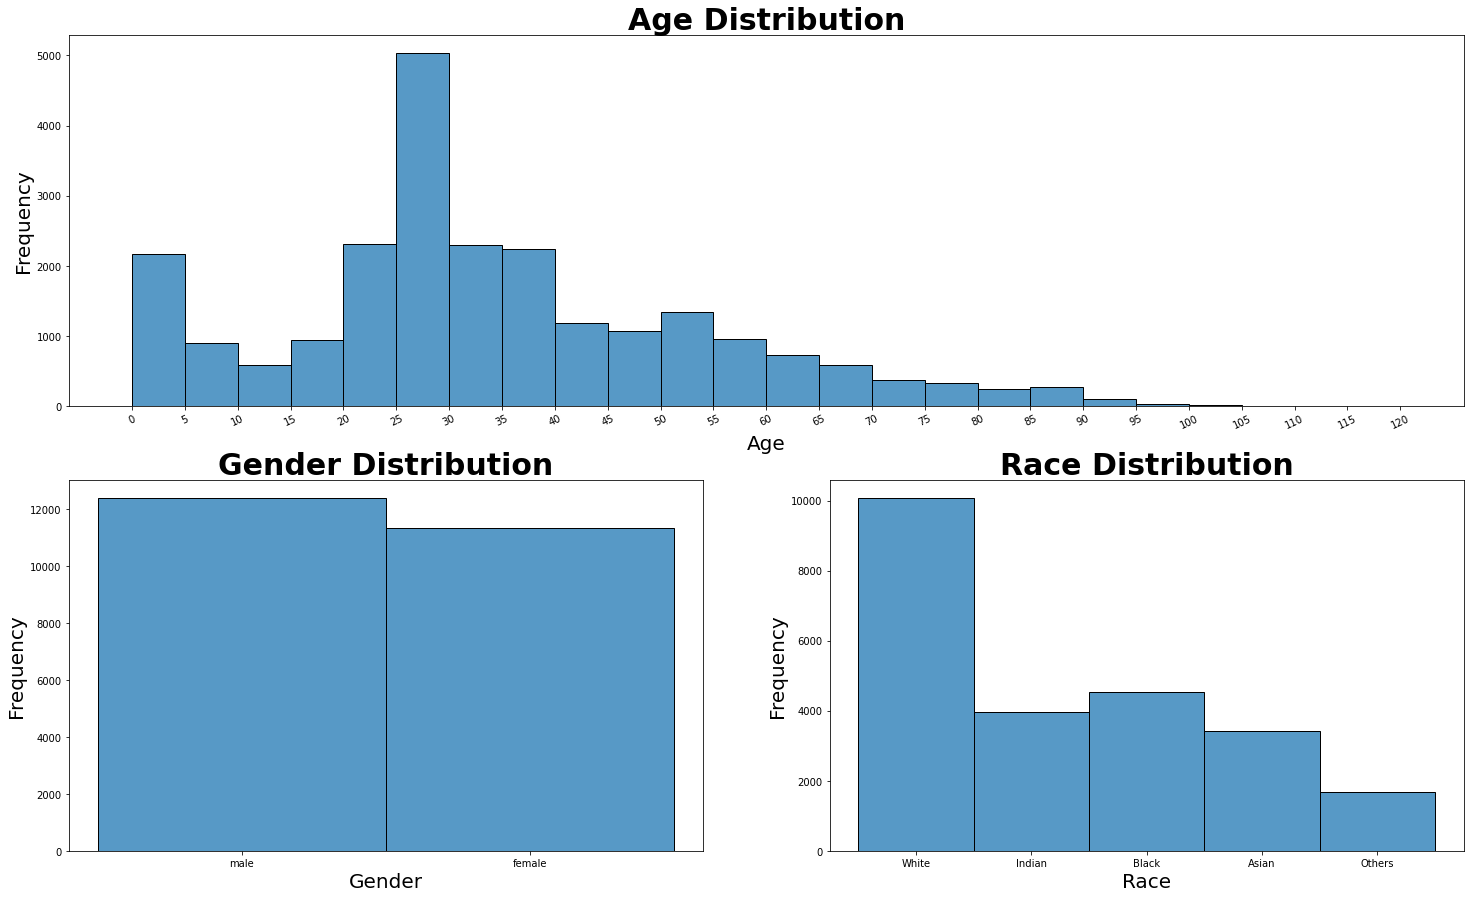

In [23]:
f = plt.figure(figsize=(25,15))
bins_value = list(range(0,125,5))

# Age Histogram
f.add_subplot(211)
sns.histplot(data=img_df,x = 'age', bins=bins_value)
plt.title('Age Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(bins_value, rotation = 25)

# Gender Histogram
f.add_subplot(223)
sns.histplot(img_df['gender'])
plt.title('Gender Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

# Race Histogram
f.add_subplot(224)
sns.histplot(img_df['race'])
plt.title('Race Distribution',fontweight="bold",fontsize=30)
plt.xlabel('Race',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks()

plt.show()